In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Calculating salaries of individuals

In [15]:
bank = pd.read_csv('simulated_transaction_2024.csv')

In [16]:
# max and min dates in bank dataset
# convert 'Date' to datetime format'
bank['Date'] = pd.to_datetime(bank['Date'],dayfirst=True)

# find the max and min dates in the dataset
max_date = bank['Date'].max()
min_date = bank['Date'].min()

# print the max and min dates
print('Max date: ', max_date)
print('Min date: ', min_date)

Max date:  2023-12-06 00:00:00
Min date:  2023-01-01 00:00:00


In [19]:
bank['Time Pandas'] = pd.to_datetime(bank['Timestamp'],format= "%H:%M")
bank['Time Pandas'] = bank['Time Pandas'].dt.time

In [20]:
bank.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Time Pandas
0,2023-01-01,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home,00:00:00
1,2023-01-01,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,00:00:00
2,2023-01-01,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN,00:00:00
3,2023-01-01,00:00,283027736.0,1787.0,780.0,472213568.0,NaN,00:00:00
4,2023-01-01,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face,00:00:00


In [21]:
# Just get positive transactions into the balance

print('Number of unique accounts in original bank: ', len(bank['Account No'].unique()))

bank_amount_incomings = bank[bank['Amount'] > 0]

# remove rows with null values in 'Third Party Name'
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Third Party Name'].notnull()]

#check if there are any null values in the dataset
bank_amount_incomings.isnull().sum()

# print number of unique accounts
print('Number of unique accounts after filtering for incomings only: ', len(bank_amount_incomings['Account No'].unique()))

bank_amount_incomings.head(10)

Number of unique accounts in original bank:  977
Number of unique accounts after filtering for incomings only:  617


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Time Pandas
0,2023-01-01,00:00,678330503.0,2971.00,1584.00,NaN,Westport Care Home,00:00:00
1,2023-01-01,00:00,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique,00:00:00
4,2023-01-01,00:00,624500124.0,3226.00,1825.00,NaN,Fat Face,00:00:00
5,2023-01-01,00:00,203466392.0,4607.66,2841.66,NaN,Lavender Primary,00:00:00
6,2023-01-01,00:00,768271776.0,3620.00,1950.00,NaN,A Cut Above,00:00:00
9,2023-01-01,00:00,456221621.0,2831.00,1675.00,NaN,Tesco,00:00:00
10,2023-01-01,00:00,350921975.0,2458.50,1842.50,NaN,Brilliant Brushes,00:00:00
12,2023-01-01,00:00,455831435.0,3253.10,1620.10,NaN,Costa Coffee,00:00:00
15,2023-01-01,00:00,832564361.0,5376.00,3542.00,NaN,Premier Finance,00:00:00
16,2023-01-01,00:00,407574996.0,3151.00,1609.00,NaN,Fat Face,00:00:00


In [22]:
# filter rows for only 2nd month of the year
bank_feb = bank_amount_incomings[bank_amount_incomings['Date'].dt.month == 2]

# get max and min dates in february
max_date_feb = bank_feb['Date'].max()
min_date_feb = bank_feb['Date'].min()

print('Max date in February: ', max_date_feb)
print('Min date in February: ', min_date_feb)

bank_feb.tail(15)


Max date in February:  2023-02-28 00:00:00
Min date in February:  2023-02-01 00:00:00


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Time Pandas
38879,2023-02-28,00:00,833499132.0,2556.168350,2708.00,NaN,Halifax,00:00:00
38882,2023-02-28,00:00,859264768.0,1815.465942,1545.00,NaN,Vision Express,00:00:00
38885,2023-02-28,00:00,788740658.0,2537.061150,1675.00,NaN,Matalan,00:00:00
38886,2023-02-28,00:00,106601471.0,2845.874540,1675.00,NaN,Hobbycraft,00:00:00
38887,2023-02-28,00:00,696333897.0,1716.316000,1842.50,NaN,Jollyes,00:00:00
38890,2023-02-28,00:00,558875206.0,3076.427350,3125.00,NaN,CPA,00:00:00
38891,2023-02-28,00:00,331450202.0,3791.867700,3087.75,NaN,CPA,00:00:00
38892,2023-02-28,00:00,683078800.0,3375.129867,3126.00,NaN,LBG,00:00:00
38895,2023-02-28,00:00,651756497.0,6075.964878,4375.00,NaN,CPA,00:00:00
38896,2023-02-28,00:00,435984758.0,2746.848874,2250.00,NaN,LBG,00:00:00


- Potentially need to remove last month as it only goes up to the 6th so may miss some people's incomes coming in as they seem to come in throughout the month.

In [23]:
# drop transactions in december
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Date'].dt.month != 12]

# group by Account No and sum the 'Amount' for each account
income_per_account = bank_amount_incomings.groupby('Account No')['Amount'].sum()

# calculate the annual income for each account
incomes=(income_per_account/11)*12 # multiply by 12 to get annual income
incomes_monthly = income_per_account/11

<Axes: xlabel='Amount', ylabel='Count'>

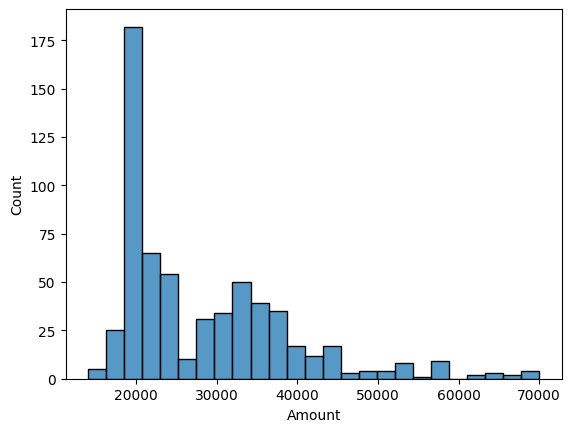

In [29]:
# kde plot of income per account
sns.histplot(incomes, fill=True,bins=25)

Salary distribution seems to roughly align with [ONS Data](https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/bulletins/householddisposableincomeandinequality/yearending2018)

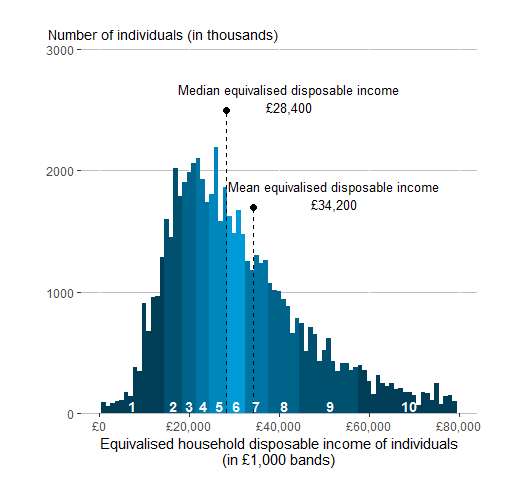